# 시계열

## 독립변인(X)이 "시간" 또는 "연속"
- 고대: "달, 온도, 강 수위, 수확량, 햇빛" => 시간에 양향을 받음
- 근대: "교육, 의료, 기후, 마케팅" => 시간에 영향을 받음

## 목적
- 고전모델(무작위 프로세스): (t+1)
- 딥러닝 모델: (t+k)

## 시계열 특징
- 주기
- 특정 값 내의 변동(속성)

위의 특징들을 삭제해야 함

## 시계열 예측
- 시계열의 주요 특징인 주기성과 특정 값 내의 변동을 처리한 데이터를 활용
- 시계열 모델을 생성하는 것으로 가정

## 시계열 문제
- 예측
- 이상 탐지

## 무작위 행보

> 이론적 시계열 모델은 무작위성을 가진다고 가정합니다. 그런데, 컴퓨터는 그렇지 않습니다.

<function matplotlib.pyplot.show(close=None, block=None)>

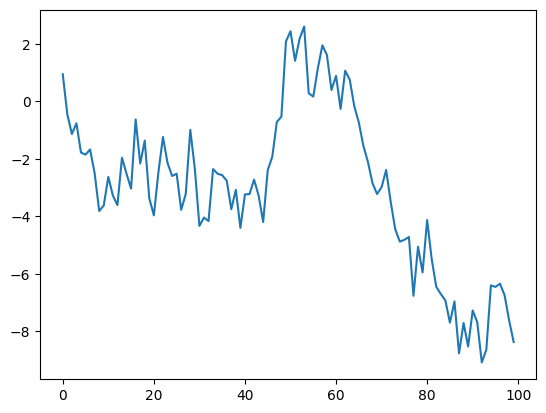

In [4]:
import matplotlib.pyplot as plt
import random

def getnerate_random_walk(length=100, mu=0, sig=1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i ==0:
            ts.append(e)
        else:
            ts.append(ts[i-1] + e)
    return ts

random.seed(0)
random_walk = getnerate_random_walk()
plt.plot(random_walk)
plt.show

추세:: 전역에서의 방향성 -> 제한해야함(전역이니까)
계절성:: 반복적 변화

## 추세(Trend)

> 전역 시계열 방향

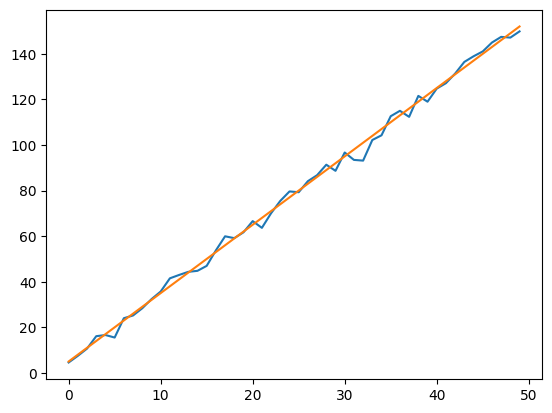

In [ ]:
random.seed(42)
length = 50
a = 5
b = .5
c = 3
trend = [ a + c * i for i  in range(length)]
noise = [c * random.gauss(0, 1) for i in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

## 계절성

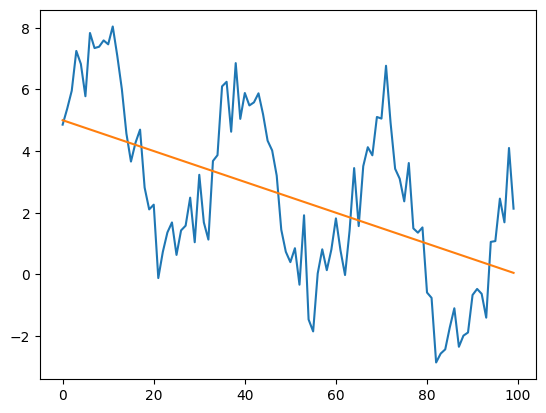

In [ ]:
import math
random.seed(42)
length = 100
a = 5
b = -0.05
c = 1
s = 3
trend = [ a + b * i for i  in range(length)]
seasons = [s * math.sin(i / 5) for i in range(length)]
noise = [c * random.gauss(0, 1) for i in range(length)]
ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

## 정상성
- O:: 랜덤워크
- X:: 추세, 계절성

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import FinanceDataReader as fdr

quotes = fdr.DataReader("AAPL", "2011-01-01", "2024-12-31")
model = AutoReg(quotes["Close"], lags=2)    # 이전데이터 2개를 봄
model_fit = model.fit()
print(model_fit.params)

# 결과분석:: 애플의 다음날 주가 가격은? 0.023316 + ( 0.985331 * 애플의 오늘 주가) + (0.015291 * 애플의 어제 주가)

const       0.023316
Close.L1    0.985331
Close.L2    0.015291
dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## ARIMA

- AR 모델의 고급 형태
- 관측값(y)과 지연된 관측값(p)에 적용된 이동평균모델(MA)의 잔차/오차 사이의 종속성을 포함


In [28]:
from statsmodels.tsa.arima.model import ARIMA
import FinanceDataReader as fdr

from_data = "2015-1-1"
to_data = "2020-10-1"

quotes = fdr.DataReader("AAPL", start=from_data, end= to_data)
closes = quotes["Close"].values

train, test= closes[: -1], closes[-1]

model = ARIMA(train, order=(5,2,3)) 
result = model.fit()
forecast = result.forecast()
predicted = forecast[0]
print(predicted, test)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


114.18987562163126 115.80999755859375


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# model = ARIMA(train, order=(p, d, q))
# model = ARIMA(train, order=(5, 2, 3))
# box-jenkins method: 시계열 과거 값에 대한 시계열 모델 최적합을 찾음
# p: AR차수 => PACF지표에서 찾음
# d: 차분 => 만약 정상성이 아니라면 차분을 하는데 회수, p-value < 0.05
# q: MA차수 => ACF

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

result = adfuller(closes)
result[1] # p-value

# 차분_ 해서 안되면 정상성모델xx
diff_closes = np.diff(closes, n=2) # 보통 차분계수 0
result = adfuller(diff_closes)
result[1] > 0.05 

np.False_

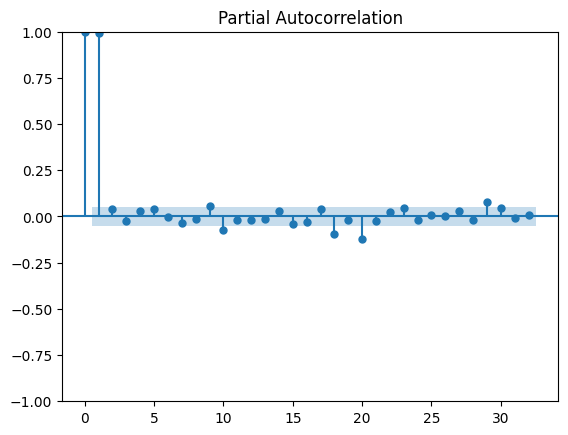

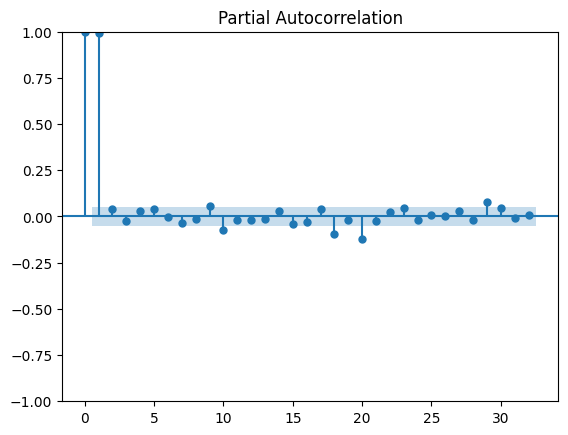

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(closes)

## 고전적 모델
- 장점: 인기있고, 안정적 __정상성 데이터여서
- 단점
    - 단일 변수 시게열에서만 작동
    - **장기예측이 안됨 __ 데이터를 계속 먹어야함 -> 오차가 생김 -> 역전파를 해야함 -> 순서있는 딥러닝 -> ``RNN``


## 딥러닝을 활용해서 시계열 문제를 해결할 수 있어??

- 슬라이딩 윈도우(Pandas, 슬라이딩 윈도우, shift 함수)
- 전처리/후처리
    - 전처리 중 가장 중요한 것 ``n/a``: fillna(df.mean()), iterpolate, bfill, ffill
    - 후처리 중 가장 중요한 것 ``정규화, 추세 제거, 차분``

## RNN을 사용한 시계열 문제 해결

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import MinMaxScaler

## 1. 데이터 불러오기

In [ ]:
df = pd.read_csv("data/SBUX.csv")
# Adj Close(종가평균), Volume(판매량?)
# Date: 독립변인
X = df["Date"] # 문자열
y = df["Close"] # 숫자

In [46]:
class SBUXDataset(Dataset):
    # 데이터셋 만들어보세요!
    def __init__(self, csv_file="data/SBUX.csv", seq_length=2, is_train=True):
        self.seq_length = seq_length
        self.is_train = is_train

        # 데이터 로드
        df = pd.read_csv(csv_file)
        data = df['Close'].values.reshape(-1,1)

        # 데이터 정규화
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(data)

        # 시퀀스 데이터 생성
        X, y = self._create_seq(scaled_data, seq_length)

        # 학습 및 테스트 데이터 분리/인덱스 계산
        train_size = int(len(X) * 0.8)

        if self.is_train:
            self.X = torch.FloatTensor(X[:train_size])
            self.y = torch.FloatTensor(y[:train_size])
            self.datas = df['Date'].iloc[self.seq_length : train_size + self.seq_length] # 시퀀스 길이를 고려한 날짜
        else:
            self.X = torch.FloatTensor(X[train_size:])
            self.y = torch.FloatTensor(y[train_size:])
            self.datas = df['Date'].iloc[train_size + self.seq_length] # 시퀀스 길이를 고려한 날짜

    def _create_seq(self, data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i: i + seq_length]
            y = data[i + seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


In [48]:
seq_length = 10
batch_size = 16

In [49]:
train_dataset = SBUXDataset( seq_length=seq_length, is_train=True)   # 학습데이터인가__ 테스트는 답안지 없으니까
test_dataset = SBUXDataset( seq_length=seq_length, is_train=False) 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
teset_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

- cnn은 배치사이즈만큼만 감
- rnn

In [ ]:
for i in train_loader:
    print(i[0].shape, i[1].shape)
# 결과: [batch_size, seq_length, dim(차원)]

torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([16, 10, 1]) torch.Size([16, 1])
torch.Size([2, 10, 1]) torch.Size([2, 1])


## 2. 전처리

In [53]:
# 위에서 처리함

## 3. 학습


In [ ]:
class RNNModule(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):   # output: 몇일을 볼건지
        super(RNNModule, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNNCell(input_size, output_size) # 모델x, 셀oo
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h_t = torch.zeros(batch_size, self.hidden_size).to(x.device)

        for t in range(x.size(1)):
            h_t = self.rnn_cell(x[:,t,:], h_t)
        output = self.fc(h_t)
        return output

## 4. 평가

In [58]:
n_feat = 2
hidden_dim = 5

torch.manual_seed(19)

rnn_cell = nn.RNNCell(input_size=n_feat, hidden_size=hidden_dim)
rnn_state = rnn_cell.state_dict()
rnn_state
# 결과
# ih(입력), hh(은닉층)
# 행: 은닉층 개수(hidden_dim) , 열: 속성(n_feat)
# hh에서 속성이 늘어남

OrderedDict([('weight_ih',
              tensor([[ 0.4191, -0.2684],
                      [ 0.3398,  0.1451],
                      [-0.2539, -0.3406],
                      [-0.1237, -0.4323],
                      [ 0.3133,  0.4132]])),
             ('weight_hh',
              tensor([[-0.2255, -0.1837, -0.4238, -0.3675, -0.0107],
                      [-0.3703,  0.0733, -0.4413,  0.2050, -0.0622],
                      [-0.2000, -0.1361,  0.0456, -0.2051,  0.1461],
                      [-0.2200,  0.3788,  0.0356, -0.3454, -0.0863],
                      [ 0.3692,  0.4014,  0.3933,  0.4310, -0.1184]])),
             ('bias_ih',
              tensor([-0.2476, -0.3813, -0.0281, -0.2578,  0.3717])),
             ('bias_hh',
              tensor([-0.0274,  0.0131, -0.2531, -0.2708, -0.4440]))])